In [1]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  

In [2]:
students = pd.read_csv("students.csv")
course_activity = pd.read_csv("course_activity.csv")
feedback = pd.read_csv("feedback.csv")

In [3]:
print(students.head())
print(course_activity.head())
print(feedback.head())

print(students.info())
print(course_activity.info())
print(feedback.info())


  Student_ID       Name  Age  Gender   Location Enrolment_Date
0       S001  Student_1   24  Female    Kolkata     24/11/2023
1       S002  Student_2   32   Other    Chennai     27/02/2023
2       S003  Student_3   28   Other     Mumbai     13/01/2023
3       S004  Student_4   25  Female  Bangalore     21/05/2023
4       S005  Student_5   24   Other      Delhi     06/05/2023
  Student_ID Course_ID        Date  Time_Spent_Minutes  Completion_Percentage
0       S001     PY202  05/01/2024                  90                  46.10
1       S001     DM101  28/01/2024                 155                  88.87
2       S001     UX303  28/01/2024                 177                  54.93
3       S002     PY202  03/02/2024                  45                  32.20
4       S002     UX303  15/03/2024                 119                  90.80
  Student_ID Course_ID  Rating       Feedback_Text
0       S057     UX303       2      Too fast-paced
1       S063     PY202       2  Loved the examples
2

In [7]:
# Convert to datetime
students["Enrolment_Date"] = pd.to_datetime(students["Enrolment_Date"], dayfirst=True)
course_activity["Date"] = pd.to_datetime(course_activity["Date"], dayfirst=True)

# Remove duplicates
students = students.drop_duplicates()
course_activity = course_activity.drop_duplicates()
feedback = feedback.drop_duplicates()


In [9]:
# What is the overall average completion rate across courses?
avg_completion = course_activity["Completion_Percentage"].mean()
print("Overall average completion rate is:", round(avg_completion, 2), "%")


Overall average completion rate is: 54.78 %


In [10]:
# Which course has the highest and lowest average engagement time?
# Group by course and average time spent
avg_time_by_course = course_activity.groupby("Course_ID")["Time_Spent_Minutes"].mean()

# Print the course with highest and lowest average time spent
print("Most engaging course (highest time):", avg_time_by_course.idxmax(), "-", round(avg_time_by_course.max(), 2), "mins")
print("Least engaging course (lowest time):", avg_time_by_course.idxmin(), "-", round(avg_time_by_course.min(), 2), "mins")


Most engaging course (highest time): DM101 - 102.43 mins
Least engaging course (lowest time): PY202 - 93.9 mins


In [16]:
# How does engagement differ by age group or location?
# Define age bins and labels
bins = [0, 24, 30, 40, 100]
labels = ['<25', '25-30', '31-40', '40+']

# Create a new column in students DataFrame
students["Age_Group"] = pd.cut(students["Age"], bins=bins, labels=labels)
# Merge data to connect Time Spent with Age and Location
merged = course_activity.merge(students, on="Student_ID")
avg_time_by_age = merged.groupby("Age_Group")["Time_Spent_Minutes"].mean()
print("Average time spent by age group:\n", avg_time_by_age)
avg_time_by_location = merged.groupby("Location")["Time_Spent_Minutes"].mean()
print("\nAverage time spent by location:\n", avg_time_by_location)



Average time spent by age group:
 Age_Group
<25      100.328571
25-30     97.531646
31-40     94.718310
40+             NaN
Name: Time_Spent_Minutes, dtype: float64

Average time spent by location:
 Location
Bangalore     98.000000
Chennai       90.946746
Delhi        103.302857
Kolkata      104.384615
Mumbai        95.435484
Name: Time_Spent_Minutes, dtype: float64


C:\Users\raham\AppData\Local\Temp\ipykernel_17764\3137506066.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_time_by_age = merged.groupby("Age_Group")["Time_Spent_Minutes"].mean()


In [17]:
# What is the average feedback rating per course?
# Group feedback by Course_ID and calculate average rating
avg_rating_by_course = feedback.groupby("Course_ID")["Rating"].mean()

# Print the result
print("Average feedback rating per course:\n", avg_rating_by_course)


Average feedback rating per course:
 Course_ID
DM101    2.900000
PY202    3.277778
UX303    2.923077
WD404    2.789474
Name: Rating, dtype: float64


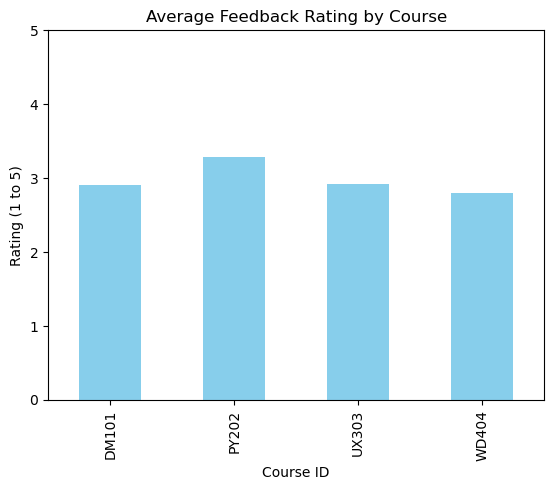

In [32]:
avg_rating_by_course.plot(kind='bar', title='Average Feedback Rating by Course', color='skyblue')
plt.ylabel("Rating (1 to 5)")
plt.xlabel("Course ID")
plt.ylim(0, 5)
plt.savefig("chart_name1.png")
plt.show()


In [19]:
# Is there a correlation between completion rate and feedback rating?
merged_feedback = course_activity.merge(feedback, on=["Student_ID", "Course_ID"])
correlation = merged_feedback["Completion_Percentage"].corr(merged_feedback["Rating"])
print("Correlation between completion % and feedback rating:", round(correlation, 2))


Correlation between completion % and feedback rating: -0.05


In [22]:
# Identify top 3 student segments based on engagement and satisfaction.
# Merge course_activity and feedback first
merged1 = course_activity.merge(feedback, on=["Student_ID", "Course_ID"])

# Then merge with students
full_merged = merged1.merge(students, on="Student_ID")
# Group by student and calculate average of each metric
student_scores = full_merged.groupby("Student_ID").agg({
    "Time_Spent_Minutes": "mean",
    "Completion_Percentage": "mean",
    "Rating": "mean"
})
student_scores["Overall_Score"] = student_scores.mean(axis=1)
top_3_students = student_scores.sort_values("Overall_Score", ascending=False).head(3)
print(top_3_students)


            Time_Spent_Minutes  Completion_Percentage  Rating  Overall_Score
Student_ID                                                                  
S059                     167.0                  99.83     1.0      89.276667
S081                     174.0                  70.42     4.0      82.806667
S083                     160.0                  75.19     5.0      80.063333


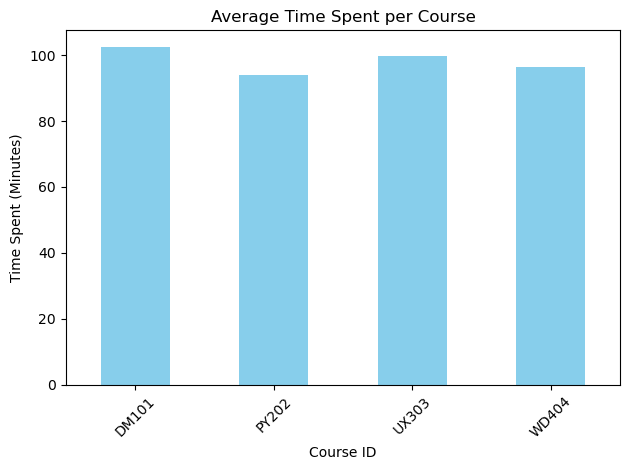

In [33]:
# Average Time Spent Per Course
avg_time_by_course.plot(kind='bar', color='skyblue')
plt.title("Average Time Spent per Course")
plt.xlabel("Course ID")
plt.ylabel("Time Spent (Minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("chart_name2.png")
plt.show()


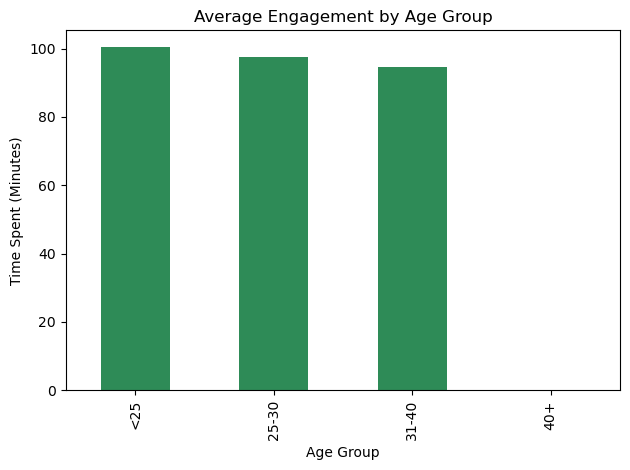

In [34]:
# Engagement by Age Group
avg_time_by_age.plot(kind='bar', color='seagreen')
plt.title("Average Engagement by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Time Spent (Minutes)")
plt.tight_layout()
plt.savefig("chart_name3.png")
plt.show()


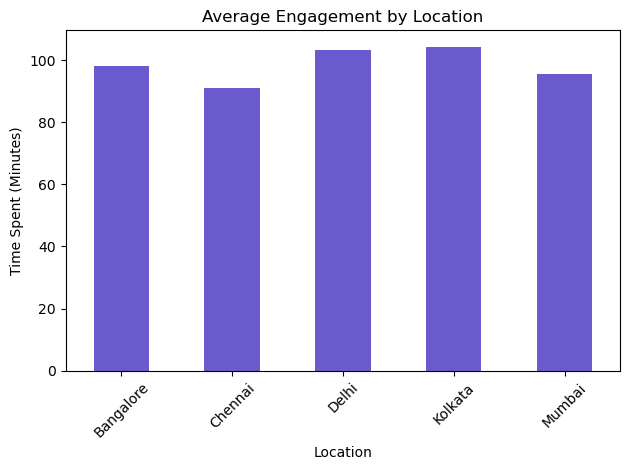

In [39]:
# Engagement by Location
avg_time_by_location.plot(kind='bar', color='slateblue')
plt.title("Average Engagement by Location")
plt.xlabel("Location")
plt.ylabel("Time Spent (Minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("chart_name4.png")
plt.show()


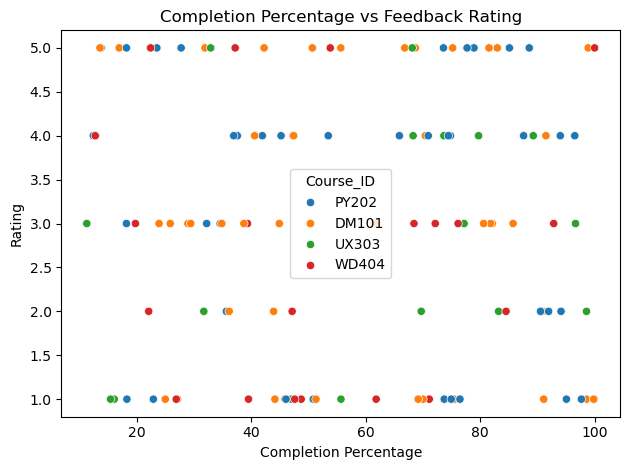

In [40]:
# Scatter Plot – Completion % vs Rating
sns.scatterplot(data=merged_feedback, x="Completion_Percentage", y="Rating", hue="Course_ID")
plt.title("Completion Percentage vs Feedback Rating")
plt.xlabel("Completion Percentage")
plt.ylabel("Rating")
plt.tight_layout()
plt.savefig("chart_name5.png")
plt.show()
